# Using Exploratory Data Analysis to Generate Movie Insights for Microsoft

## 1. Business Understanding

###  Problem Statement

> Microsoft company, having seen how well the movie industry is doing, have spotted a business opportunity in the same. The company is therefore looking to create a movie studio. However, this may pose a challenge because it is a very new development and the company does not have enough insight on how to go about it. 

> Since Microsoft have no experience in creating movies, this exploratory data analysis seeks to find what types of films are currently doing the best at the box office. The findings from this insight will be used to come up with recommendations on the right course of action for Microsoft to take following the best performing films.

## 2. Data Understanding

The dataset used for this anaysis contains information about movie sites. The data has five files: , bom_movies, tmdb_movies, tn_movie_budgest, movie_basics and movie_ratings.The data has the following set of information about the movies:

>Studio

>Production Budget

>Genres

>Domestic and Foreign Gross Income

>Average Movie Ratings

>Number of Votes

>Movie Runtime

>Release Date

>Popularity

>Movie titles

>Original Language

## 3. Data Wrangling

In [1]:
#Importing the relevant packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Loading datasets from our various sources i.e csv
bom_movies = pd.read_csv('bom.movie_gross.csv')
tmdb_movies = pd.read_csv('tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv')

In [3]:
# Importing Sqlite3 Module
import sqlite3
# Making a connection between sqlite3
# database and Python Program
conn = sqlite3.connect('im.db')
 # Getting all tables from sqlite_master
sql_query = """SELECT name FROM sqlite_master WHERE type='table';"""
 # Creating cursor object using connection object
cursor = conn.cursor()
# executing our sql query
cursor.execute(sql_query)
print("List of tables\n")
# printing all tables list
print(cursor.fetchall())

List of tables

[('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]




### a) Checking and Understanding the Data

In [4]:
# For 'im.db' data, the relevant data to this analysis is from movie_basics and m0vie_ratings tables. Therefore, we check the two table
q = '''SELECT *
    FROM movie_basics;
    '''
pd.read_sql(q, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [5]:
movie_basics = pd.read_sql(q, conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
#checking the movie_ratings dataset
q2 = '''SELECT *
     FROM movie_ratings;
     '''
pd.read_sql(q2, conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [7]:
movie_ratings = pd.read_sql(q2, conn)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [8]:
# Determining the no. of records in each of our csv datasets
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [9]:
# seeking further information from the bom_movies dataset (helps to gain better understanding components of the data)
bom_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [10]:
#checking the tmdb_movies dataset
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [11]:
#Dropping the column Unnamed because it is irrelevant to the dataset
tmdb_movies = tmdb_movies.drop(['Unnamed: 0'], axis = 1)
tmdb_movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [12]:
#seeking further information from the tmdb_movies dataset
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [13]:
#checking the tn_movie_budgets dataset
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [14]:
#seeking further information from the tn_movie_budgets dataset
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [15]:
# Checking whether each column has an appropriate datatype
bom_movies_df = (bom_movies)
bom_movies_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [16]:
tmdb_movies_df = (tmdb_movies)
tmdb_movies_df.dtypes

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [17]:
tn_movie_budgets_df = (tn_movie_budgets)
tn_movie_budgets_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [18]:
'''Following the information observed from the datasets selected, some columns of several datasets seem to have missing values and inconsistent data'''

'Following the information observed from the datasets selected, some columns of several datasets seem to have missing values and inconsistent data'

### b) Checking for Inconsistencies, duplicates and missing values

Having studied the data and realized several of them have missing values,so for this next step we check for missing values and other inconsistencies and possible duplicates we identify and handle them.For the relevant datasets, dropping the rows with the missing values is the most suitable solution. 

####  Duplicates

In [19]:
# Checking for duplicates in movie_basics
def checkIfDuplicates_1(movie_basics):
    ''' Check if given list contains any duplicates '''
    if len(movie_basics) == len(set(movie_basics)):
        return False
    else:
        return True
result = checkIfDuplicates_1(movie_basics)
if result:
    print('Yes, list contains duplicates')
else:
    print('No duplicates found in list')

Yes, list contains duplicates


In [20]:
movie_basics.duplicated().sum()

0

There are no duplicates in movie_basics. We therefore move on to the next dataset

In [21]:
# Checking for duplicates in movie_ratings
movie_ratings.duplicated().sum()

0

Similarly, there are no duplicates in movie_ratings

In [22]:
#Checking for duplicates in bom_movies
bom_movies.duplicated().value_counts()

False    3387
dtype: int64

In [23]:
#Checking for duplicates in tmdb_movies
tmdb_movies.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [24]:
#Cheking for duplicates in tn_movie_budgets
tn_movie_budgets.duplicated().value_counts()

False    5782
dtype: int64

the tmdb_movies dataset has 1020 duplicates. In the next process, we will drop these columns

#### Missing Values

runtime_minutes column in movie_basics has null values in 31739 out of 146144 rows. In the next process, we will drop these rows since the remaining ones will still be sufficient for the analysis.

Genres column in movie_basics has 5408 rows with null values

In [25]:
movie_ratings.isna().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

both columns in movie_ratings have no missing values

In [26]:
#checking for missing values in bom_movies
bom_movies.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

studio, domestic_gross, and foreign_gross columns contain rows with missing values. In the next step, the rows will be dropped since they are of insignificant effect to the whole analysis process.

In [27]:
#checking for missing values in tmdb_movies
tmdb_movies.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

tmdb_movies has no null values

In [28]:
#checking for missing values in th_movie_budgets
tn_movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [29]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


tn_movie_budgets has no null values

## 4. Data Cleaning

The most prevalent issue with the dataset we have is missing values and duplicates. Therefore, in this process we are going to handle that by dropping the rows with the null values.

In [30]:
# Dealing with duplicates in tmdb_movies
# Use keep=False to keep all duplicates and sort_values to put duplicates next to each other
tmdb = tmdb_movies
tmdb[tmdb.duplicated(keep=False)].sort_values(by='genre_ids')

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
14538,"[10402, 10749, 35, 18]",207936,en,Tumbledown,7.004,2015-04-18,Tumbledown,6.4,88
17813,"[10402, 10749, 35, 18]",207936,en,Tumbledown,7.004,2015-04-18,Tumbledown,6.4,88
10532,"[10402, 18, 10749, 35]",350331,en,B-Side,0.600,2015-07-21,B-Side,5.8,2
17037,"[10402, 18, 10749, 35]",350331,en,B-Side,0.600,2015-07-21,B-Side,5.8,2
18025,"[10402, 18, 80, 35]",340275,en,Chi-Raq,5.310,2015-12-04,Chi-Raq,5.7,95
...,...,...,...,...,...,...,...,...,...
19267,[],332665,en,Men Go to Battle,0.900,2016-07-08,Men Go to Battle,5.0,6
10706,[],218861,en,After Warhol,0.600,2011-12-31,After Warhol,5.0,1
19309,[],382996,en,Death in the Desert,0.882,2015-10-09,Death in the Desert,4.0,1
15987,[],382996,en,Death in the Desert,0.882,2015-10-09,Death in the Desert,4.0,1


In [31]:
 # Remove duplicates
tmdb = tmdb.drop_duplicates()
tmdb.shape 
# Previously this was (26517, 9), now we have dropped duplicate rows

(25497, 9)

In [32]:
# Recheck for duplicates
tmdb.duplicated().value_counts()

False    25497
dtype: int64

In [33]:
tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Duplicates no longer exist in tmdb dataset

In [34]:
movie_basics = movie_basics.dropna()
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
146134,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
146135,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
146136,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
146137,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [35]:
movie_basics.isna().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [36]:
# Dropping missing values in bom_movies
bom_movies = bom_movies.dropna()
bom_movies

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000,2018
3286,The Catcher Was a Spy,IFC,725000.0,229000,2018
3309,Time Freak,Grindstone,10000.0,256000,2018
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200,2018


In [37]:
# Rechecking for missing values 
bom_movies.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

## 5. Merging Datasets

 Having carried out the necessary data checks and cleaning processes, the data is ready to be analyzed. This process involves merging the different sets oof data we have into a single dataset.

In [103]:
# First join the two SQl tables, movie_basics and movie_ratings
cleaned_data1 = '''SELECT movie_basics.runtime_minutes,movie_basics.genres,
                   movie_ratings.averagerating, movie_ratings.numvotes
                   FROM (movie_basics ,movie_ratings) AS cleaned_data1
                   WHERE  movie_basics.movie_id =movie_ratings.movie_id;
                '''
pd.read_sql(cleaned_data1, conn)

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
3,NaN,"Comedy,Drama",6.1,13
4,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...
73851,75.0,Documentary,6.2,6
73852,98.0,"Drama,Family",8.7,136
73853,NaN,Documentary,8.5,8
73854,NaN,None,6.6,5


In [104]:
cleaned_data1 = pd.read_sql(cleaned_data1, conn)
cleaned_data1

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
3,NaN,"Comedy,Drama",6.1,13
4,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...
73851,75.0,Documentary,6.2,6
73852,98.0,"Drama,Family",8.7,136
73853,NaN,Documentary,8.5,8
73854,NaN,None,6.6,5


In [105]:
cleaned_data1.isna().sum()

runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

We now have a single dataset with the relevant columns from the two datasets. However, since the number of rows and columns were unmatched, we have ended up with several rows in runtime_minutes column. We will need to drop the rows with missing values again.

In [111]:
cleaned_data1 = cleaned_data1.dropna()

In [112]:
cleaned_data1

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
4,80.0,"Comedy,Drama,Fantasy",6.5,119
6,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...
73849,130.0,Drama,8.4,365
73850,86.0,Documentary,6.2,5
73851,75.0,Documentary,6.2,6
73852,98.0,"Drama,Family",8.7,136


In [85]:
# Now we merge the three csv datasets; bom_movies, tmdb and tn_movie_budgets
df = pd.concat([bom_movies, tmdb, tn_movie_budgets])
df

,title,studio,domestic_gross,foreign_gross,year,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count,movie,production_budget,worldwide_gross
0,Toy Story 3,BV,4.15e+08,652000000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alice in Wonderland (2010),BV,3.342e+08,691300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,WB,2.96e+08,664300000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Inception,WB,2.926e+08,535700000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shrek Forever After,P/DW,2.387e+08,513900000,2010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,NaN,NaN,$0,NaN,NaN,NaN,78.0,NaN,NaN,NaN,"Dec 31, 2018",NaN,NaN,Red 11,"$7,000",$0
5778,NaN,NaN,"$48,482",NaN,NaN,NaN,79.0,NaN,NaN,NaN,"Apr 2, 1999",NaN,NaN,Following,"$6,000","$240,495"
5779,NaN,NaN,"$1,338",NaN,NaN,NaN,80.0,NaN,NaN,NaN,"Jul 13, 2005",NaN,NaN,Return to the Land of Wonders,"$5,000","$1,338"
5780,NaN,NaN,$0,NaN,NaN,NaN,81.0,NaN,NaN,NaN,"Sep 29, 2015",NaN,NaN,A Plague So Pleasant,"$1,400",$0


With respect to what the analysis seeks to achieve, we only need a few columns from the merged dataset, that is the domestic_gross, foreign_gross, popularity, vote_average, and production_budget. The other columns proving irrelevant to this analysis, will therefore be dropped.

In [86]:
df.isna().sum()

title                 5782
studio               31279
domestic_gross       25497
foreign_gross        31279
year                 31279
genre_ids             7789
id                    2007
original_language     7789
original_title        7789
popularity            7789
release_date          2007
vote_average          7789
vote_count            7789
movie                27504
production_budget    27504
worldwide_gross      27504
dtype: int64

In [87]:
df.drop(['studio','year','genre_ids', 'id', 'original_language', 'original_title', 'release_date', 'vote_count', 'movie', 'worldwide_gross'], axis=1, inplace=True)

In [88]:
df

,title,domestic_gross,foreign_gross,popularity,vote_average,production_budget
0,Toy Story 3,4.15e+08,652000000,NaN,NaN,NaN
1,Alice in Wonderland (2010),3.342e+08,691300000,NaN,NaN,NaN
2,Harry Potter and the Deathly Hallows Part 1,2.96e+08,664300000,NaN,NaN,NaN
3,Inception,2.926e+08,535700000,NaN,NaN,NaN
4,Shrek Forever After,2.387e+08,513900000,NaN,NaN,NaN
...,...,...,...,...,...,...
5777,NaN,$0,NaN,NaN,NaN,"$7,000"
5778,NaN,"$48,482",NaN,NaN,NaN,"$6,000"
5779,NaN,"$1,338",NaN,NaN,NaN,"$5,000"
5780,NaN,$0,NaN,NaN,NaN,"$1,400"


There are several columns with null values, we drop popularity and vote_average colums and replace the null values in production_budget because the data is very significant to the analysis.

In [89]:
df.drop(['popularity', 'vote_average'], axis=1, inplace=True)

In [90]:
df

,title,domestic_gross,foreign_gross,production_budget
0,Toy Story 3,4.15e+08,652000000,NaN
1,Alice in Wonderland (2010),3.342e+08,691300000,NaN
2,Harry Potter and the Deathly Hallows Part 1,2.96e+08,664300000,NaN
3,Inception,2.926e+08,535700000,NaN
4,Shrek Forever After,2.387e+08,513900000,NaN
...,...,...,...,...
5777,NaN,$0,NaN,"$7,000"
5778,NaN,"$48,482",NaN,"$6,000"
5779,NaN,"$1,338",NaN,"$5,000"
5780,NaN,$0,NaN,"$1,400"


In [91]:
# Replacing the null values in production_budget
df.production_budget.fillna(0,inplace=True)

In [92]:
df

,title,domestic_gross,foreign_gross,production_budget
0,Toy Story 3,4.15e+08,652000000,0
1,Alice in Wonderland (2010),3.342e+08,691300000,0
2,Harry Potter and the Deathly Hallows Part 1,2.96e+08,664300000,0
3,Inception,2.926e+08,535700000,0
4,Shrek Forever After,2.387e+08,513900000,0
...,...,...,...,...
5777,NaN,$0,NaN,"$7,000"
5778,NaN,"$48,482",NaN,"$6,000"
5779,NaN,"$1,338",NaN,"$5,000"
5780,NaN,$0,NaN,"$1,400"


In [93]:
# Replace the null values in foreign_gross with zero
df.foreign_gross.fillna(0,inplace=True)

In [94]:
df

,title,domestic_gross,foreign_gross,production_budget
0,Toy Story 3,4.15e+08,652000000,0
1,Alice in Wonderland (2010),3.342e+08,691300000,0
2,Harry Potter and the Deathly Hallows Part 1,2.96e+08,664300000,0
3,Inception,2.926e+08,535700000,0
4,Shrek Forever After,2.387e+08,513900000,0
...,...,...,...,...
5777,NaN,$0,0,"$7,000"
5778,NaN,"$48,482",0,"$6,000"
5779,NaN,"$1,338",0,"$5,000"
5780,NaN,$0,0,"$1,400"


In [100]:
# Drop rows with null values
df = df.dropna()

In [101]:
df

,title,domestic_gross,foreign_gross
0,Toy Story 3,4.15e+08,652000000
1,Alice in Wonderland (2010),3.342e+08,691300000
2,Harry Potter and the Deathly Hallows Part 1,2.96e+08,664300000
3,Inception,2.926e+08,535700000
4,Shrek Forever After,2.387e+08,513900000
...,...,...,...
3275,I Still See You,1400,1500000
3286,The Catcher Was a Spy,725000,229000
3309,Time Freak,10000,256000
3342,Reign of Judges: Title of Liberty - Concept Short,93200,5200


From our dataset, it seems the budget_column was from a dataframe with not titles, so dropping the rows with null values means we end up with no data for production_budget. For this reason, the column has been rendered irrelevant to our analysis and will therefore be dropped.

In [80]:
df

,title,domestic_gross,foreign_gross
0,Toy Story 3,4.15e+08,652000000
1,Alice in Wonderland (2010),3.342e+08,691300000
2,Harry Potter and the Deathly Hallows Part 1,2.96e+08,664300000
3,Inception,2.926e+08,535700000
4,Shrek Forever After,2.387e+08,513900000
...,...,...,...
5777,NaN,$0,0
5778,NaN,"$48,482",0
5779,NaN,"$1,338",0
5780,NaN,$0,0


Our final dataframe (df), has 2007 rows and 3 columns. We now have two datasets that we are going to explore and analyze, cleaned_data1 and df

## 6. Exploratory Data Analysis

> In this section, we are going to use annalyze the datasets that we have in order to come up with conclusions and recommendations on what the Microsoft CEO should do.






#### Exploring the First Dataset

##### a) How does average rating vary with movie genres?

In [113]:
# Exploring the First Dataset
cleaned_data1

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
4,80.0,"Comedy,Drama,Fantasy",6.5,119
6,83.0,"Adventure,Animation,Comedy",8.1,263
...,...,...,...,...
73849,130.0,Drama,8.4,365
73850,86.0,Documentary,6.2,5
73851,75.0,Documentary,6.2,6
73852,98.0,"Drama,Family",8.7,136


In [114]:
cleaned_data1.head(10)

,runtime_minutes,genres,averagerating,numvotes
0,175.0,"Action,Crime,Drama",7.0,77
1,114.0,"Biography,Drama",7.2,43
2,122.0,Drama,6.9,4517
4,80.0,"Comedy,Drama,Fantasy",6.5,119
6,83.0,"Adventure,Animation,Comedy",8.1,263
7,136.0,Drama,6.8,451
8,100.0,History,4.6,64
9,180.0,Documentary,7.6,53
10,89.0,Drama,6.9,120
11,60.0,Documentary,7.5,6


For this dataset, the goal is to compare the average rating of the genres. This will address the question on what genre the CEO of Microsoft should base their video content on in order to get the most views. Secondly, this dataset will be analyzed for runtime_minutes against averagerating. This will answer the question on determining for how the video should run, to ensure optimum performance.

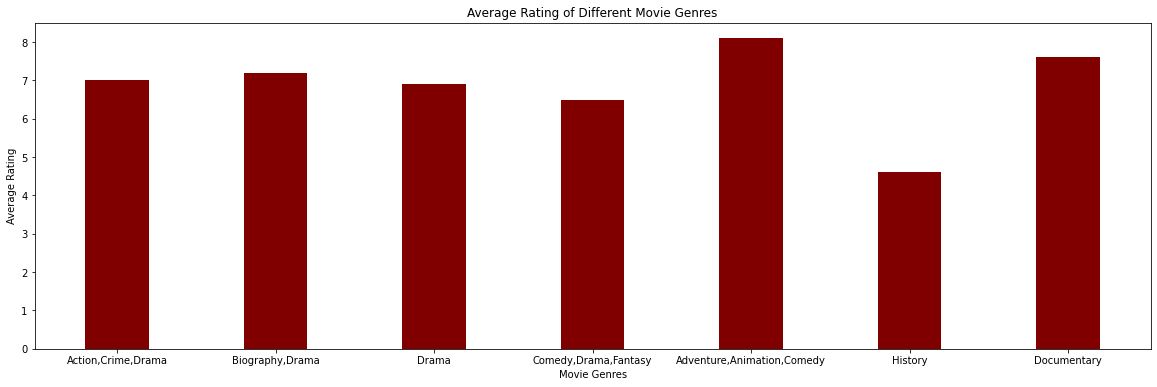

In [115]:
# Plot a bar graph with genres and averagerating as the variables

plt.data = cleaned_data1.head(10)
x = cleaned_data1.head(10)['genres']
y = cleaned_data1.head(10)['averagerating']


#We plot the graph using the above data
plt.figure(figsize = (20,6))

# Use the bar() function to create a plot using the above values of x,y
# creating the bar plot
plt.bar(x, y, color ='maroon',
        width = 0.4)
 
plt.xlabel("Movie Genres")
plt.ylabel("Average Rating")
plt.title("Average Rating of Different Movie Genres")
plt.show()

According to the graph, the differences in the average rating for the different movie genres is not very high. However, Horror and Thriller category are the lowest rated followed by History and a combination of comedy and drama. A combination of Adventure, Animation and Comedy yields the highest average rating. The documentary category also yields a high average rating.

##### b) How does runtime affect average rating?

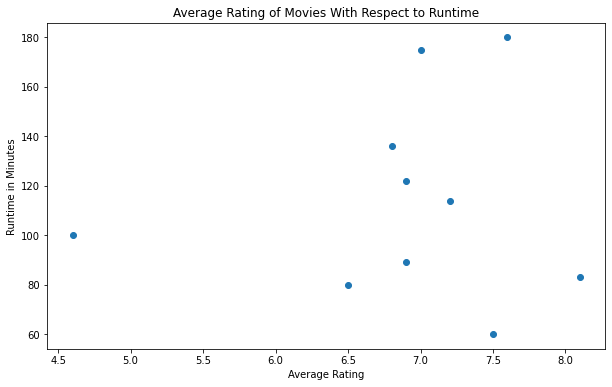

In [117]:
# Plot a scatterplot with averagerating and runtime_minutes
plt.data = cleaned_data1.head(10)

x = cleaned_data1.head(10)['averagerating']
y = cleaned_data1.head(10)['runtime_minutes']


# We plot the scatterplot using the above data
plt.figure(figsize = (10,6))

# creating the scatter plot
plt.scatter(x, y)
 
plt.xlabel("Average Rating")
plt.ylabel("Runtime in Minutes")
plt.title("Average Rating of Movies With Respect to Runtime")
plt.show()

>Movies with a highest runtime like 180 minutes and 175 minutes have the highest average rating. However, Adventure, Animation and Comedy combination of categories still have a high average rating even with low runtime.

>Following the above outcome, the better performing movies according to the ratings and runtime belong to the Adventure, Animation and Comedy combination. It is followed closely by the documentary category in terms of average rating, with a low runtime.

#### Exploring the Second Dataset

##### c) How does movie performance vary between domestic and foreign markets?

In [118]:
df 

,title,domestic_gross,foreign_gross
0,Toy Story 3,4.15e+08,652000000
1,Alice in Wonderland (2010),3.342e+08,691300000
2,Harry Potter and the Deathly Hallows Part 1,2.96e+08,664300000
3,Inception,2.926e+08,535700000
4,Shrek Forever After,2.387e+08,513900000
...,...,...,...
3275,I Still See You,1400,1500000
3286,The Catcher Was a Spy,725000,229000
3309,Time Freak,10000,256000
3342,Reign of Judges: Title of Liberty - Concept Short,93200,5200


In [139]:
# We use the top 5 entries of the dataset
df.head()

,title,domestic_gross,foreign_gross
0,Toy Story 3,4.15e+08,652000000
1,Alice in Wonderland (2010),3.342e+08,691300000
2,Harry Potter and the Deathly Hallows Part 1,2.96e+08,664300000
3,Inception,2.926e+08,535700000
4,Shrek Forever After,2.387e+08,513900000


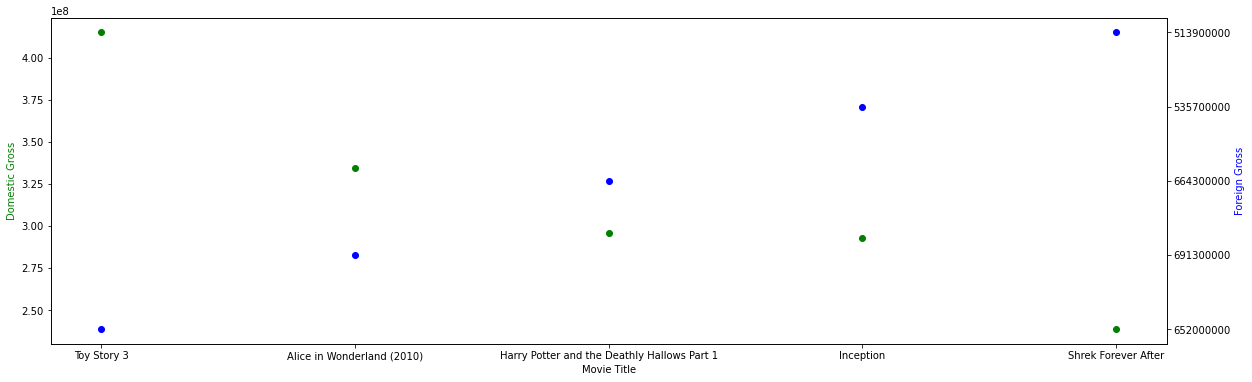

In [141]:
# Plotting a scatter plot with two variables on the y axis, foreign_gross and domestic_gross
plt.data = df.head()
fig, ax1 = plt.subplots()

# Defining the x,y1 and y2 variables
x = df.head()['title']
y1 = df.head()['domestic_gross']
y2 = df.head()['foreign_gross']


ax2 = ax1.twinx()
ax1.scatter(x, y1, color='green')
ax2.scatter(x, y2, color='blue')

ax1.set_xlabel('Movie Title')
ax1.set_ylabel('Domestic Gross', color='green')
ax2.set_ylabel('Foreign Gross', color='blue')

plt.gcf().set_size_inches((20, 6))
plt.show()

>Toy Story 3 has the lowest foreign gross income but highest domestic income, while Shrek Forever After has the lowest domestic income but the highest foreign income. Therefore, as Microsoft looks into movies to emulate, they should pay attention to whether they are looking to satisfy the foreign or domestic market. This will address the question on which option will earn them the most income.

## 7. Conclusions

> Adventure, animation and comedy, as a combined category are the highest rated genres. History is the lowest rated. Drama and Biography category also have quite the high average rating.

>When it comes to runtime, movies with a higher runtime have a higher average rating. Adventure, animation, and comedy category is however an exception to the rule. This category has the lowest runtime but still gets the highest average rating.

>Movies that perform well in the domestic market, perform poorly in foreign markets, i.e Toy Story 3 and Shrek Forever After.



## 8. Recommendations

>Microsoft should base their video on adventure, animation and comedy since these genres are doing better than the rest in terms of average ratings. They can decide to have a low or high runtime, this variable is not very significant in determining the performance of movies in those specific genres.

>Should Microsoft wish to incorporate genre to their choice, they should select from genres with a high runtime since they have a higher average rating.

>For starters Microsoft should focus on movie types that do well in the domestic market before proceeding to those that do well in foreign markets.